In [15]:
import pandas as pd

df = pd.read_parquet("../data/dados_clones.parquet")

In [16]:
df["Status_bool"] = df["Status "] == "Apto"
df.head()

,p2o_master_id,Massa(em kilos),General Jedi encarregado,Estatura(cm),Distância Ombro a ombro,Tamanho do crânio,Tamanho dos pés,Tempo de existência(em meses),Status,Status_bool
0,10578986,83.13,Yoda,180.25,Tipo 4,Tipo 1,Tipo 5,0.0,Defeituoso,False
1,10976676,83.08,Yoda,180.39,Tipo 3,Tipo 2,Tipo 5,0.0,Defeituoso,False
2,10588329,83.12,Shaak Ti,180.26,Tipo 4,Tipo 5,Tipo 5,0.0,Defeituoso,False
3,10254411,83.38,Shaak Ti,180.35,Tipo 2,Tipo 2,Tipo 5,0.0,Defeituoso,False
4,10634458,83.15,Shaak Ti,180.31,Tipo 3,Tipo 2,Tipo 2,0.0,Defeituoso,False


### O Problema

Existe alguma relação entre a fisionomia e a status do clone?

In [17]:
df.groupby(["Status "])[["Estatura(cm)","Massa(em kilos)"]].mean()

,Estatura(cm),Massa(em kilos)
Status,,
Apto,180.605545,83.765887
Defeituoso,180.400186,83.200134


In [18]:
df.groupby(["Distância Ombro a ombro"])["Status_bool"].mean()

Distância Ombro a ombro
Tipo 1    0.894749
Tipo 2    0.894665
Tipo 3    0.894456
Tipo 4    0.895459
Tipo 5    0.893713
Name: Status_bool, dtype: float64

In [19]:
df.groupby(["Tamanho do crânio"])["Status_bool"].mean()

Tamanho do crânio
Tipo 1    0.894355
Tipo 2    0.895701
Tipo 3    0.895072
Tipo 4    0.893433
Tipo 5    0.894483
Name: Status_bool, dtype: float64

In [20]:
df.groupby(["Tamanho dos pés"])["Status_bool"].mean()

Tamanho dos pés
Tipo 1    0.894781
Tipo 2    0.894215
Tipo 3    0.894962
Tipo 4    0.894309
Tipo 5    0.894775
Name: Status_bool, dtype: float64

In [21]:
df.groupby(["General Jedi encarregado"])["Status_bool"].mean()

General Jedi encarregado
Aayla Secura      1.000000
Mace Windu        1.000000
Obi-Wan Kenobi    1.000000
Shaak Ti          0.765018
Yoda              0.764945
Name: Status_bool, dtype: float64

Aparentemente nenhuma das características fisionômicas impactaram no status do clone, apenas o general Jedi que estava encarregado.
Agora colocaremos esse mesmo problema em um modelo de classificação por árvore de decisão

In [22]:
features = ["Estatura(cm)","Massa(em kilos)","Distância Ombro a ombro","Tamanho do crânio","Tamanho dos pés"]
cat_features = ["Distância Ombro a ombro","Tamanho do crânio","Tamanho dos pés"]
X = df[features]

In [23]:
from feature_engine import encoding

In [24]:
onehot = encoding.OneHotEncoder(variables=cat_features)
onehot.fit(X)
X = onehot.transform(X)
X.head()

,Estatura(cm),Massa(em kilos),Distância Ombro a ombro_Tipo 4,Distância Ombro a ombro_Tipo 3,Distância Ombro a ombro_Tipo 2,Distância Ombro a ombro_Tipo 1,Distância Ombro a ombro_Tipo 5,Tamanho do crânio_Tipo 1,Tamanho do crânio_Tipo 2,Tamanho do crânio_Tipo 5,Tamanho do crânio_Tipo 3,Tamanho do crânio_Tipo 4,Tamanho dos pés_Tipo 5,Tamanho dos pés_Tipo 2,Tamanho dos pés_Tipo 1,Tamanho dos pés_Tipo 3,Tamanho dos pés_Tipo 4
0,180.25,83.13,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
1,180.39,83.08,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
2,180.26,83.12,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,180.35,83.38,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
4,180.31,83.15,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [25]:
from sklearn import tree
import matplotlib.pyplot as plt 

In [26]:
arvore = tree.DecisionTreeClassifier(max_depth=3)
arvore.fit(X, df["Status "])

DecisionTreeClassifier(max_depth=3)

[]

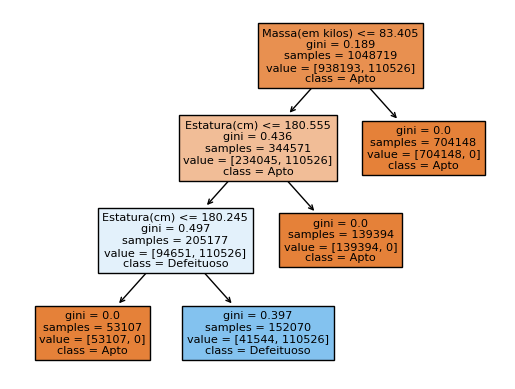

In [27]:
tree.plot_tree(arvore,
               class_names=arvore.classes_,
               feature_names=X.columns,
               filled=True)
plt.plot()

O modelo encontrou um padrão dentro dos dados
Logo no primeiro nó, todos os clones que possuem mais de 83,405 kg estão aptos, isso representa 67% de toda a base
Daqueles que restaram da base inicial, são divididos nos que possuem menos e mais que 180,555 cm, todos que possuem uma altura maior que essa, cerca de 40% da segunda base.

Uma análise inicial da base levava a entender que o motivo para o clone estar apto ou inapto, era apenas o general Jedi, porém com uma análise mais profunda, pode-se concluir que apenas os clones mais "fracos" ficaram com aqueles generais Jedis, e que os generais em si não tiveram relação com o status do clone.